In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.tabular import *

# Rossmann

## Data preparation

To create the feature-engineered train_clean and test_clean from the Kaggle competition data, run `rossman_data_clean.ipynb`. One important step that deals with time series is this:

```python
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)
```

In [3]:
path = Path('data/rossmann/')
train_df = pd.read_pickle(path/'train_clean')

In [4]:
train_df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


In [5]:
n = len(train_df); n

844338

### Experimenting with a sample

In [6]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()
small_train_df = train_df.iloc[idx[:1000]]
small_test_df = train_df.iloc[idx[1000:]]
small_cont_vars = ['CompetitionDistance', 'Mean_Humidity']
small_cat_vars =  ['Store', 'DayOfWeek', 'PromoInterval']
small_train_df = small_train_df[small_cat_vars + small_cont_vars + ['Sales']]
small_test_df = small_test_df[small_cat_vars + small_cont_vars + ['Sales']]

In [7]:
small_train_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
228,229,5,"Jan,Apr,Jul,Oct",17410.0,49,13016
721,723,5,"Feb,May,Aug,Nov",5650.0,54,12047
856,858,5,"Jan,Apr,Jul,Oct",3370.0,50,5540
1171,59,4,"Jan,Apr,Jul,Oct",2840.0,58,5556
1940,829,4,NaN,110.0,56,7339


In [8]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
427980,485,2,"Jan,Apr,Jul,Oct",3270.0,89,4129
428157,665,2,"Jan,Apr,Jul,Oct",90.0,78,7280
428577,1087,2,NaN,2210.0,82,4397
428889,285,1,NaN,2410.0,75,5113
429166,564,1,"Jan,Apr,Jul,Oct",6540.0,79,4853


In [9]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)

In [11]:
doc(Categorify)

In [10]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
427980,NaN,2,"Jan,Apr,Jul,Oct",3270.0,89,4129
428157,NaN,2,"Jan,Apr,Jul,Oct",90.0,78,7280
428577,1087.0,2,NaN,2210.0,82,4397
428889,NaN,1,NaN,2410.0,75,5113
429166,564.0,1,"Jan,Apr,Jul,Oct",6540.0,79,4853


In [13]:
small_train_df.PromoInterval.cat.categories

Index(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'], dtype='object')

In [14]:
small_train_df['PromoInterval'].cat.codes[:5]

228     1
721     0
856     1
1171    1
1940   -1
dtype: int8

In [15]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)
fill_missing(small_test_df, test=True)

In [16]:
small_train_df[small_train_df['CompetitionDistance_na'] == True]

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales,CompetitionDistance_na
90974,879,5,"Feb,May,Aug,Nov",2220.0,66,2864,True
292344,291,5,NaN,2220.0,71,7558,True
376817,879,3,"Feb,May,Aug,Nov",2220.0,64,3358,True


### Preparing full data set

In [17]:
train_df = pd.read_pickle(path/'train_clean')
test_df = pd.read_pickle(path/'test_clean')

In [18]:
len(train_df),len(test_df)

(844338, 41088)

In [19]:
procs=[FillMissing, Categorify, Normalize]

In [20]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [21]:
dep_var = 'Sales'
df = train_df[cat_vars + cont_vars + [dep_var,'Date']].copy()

In [22]:
test_df['Date'].min(), test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [23]:
cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()
cut

41395

In [24]:
valid_idx = range(cut)

In [25]:
df[dep_var].head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [28]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                   .split_by_idx(valid_idx)
                   .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                   .databunch())

In [27]:
doc(FloatList)

## Model

In [29]:
max_log_y = np.log(np.max(train_df['Sales'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [30]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=exp_rmspe)

In [31]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(26, 10)
    (7): Embedding(27, 10)
    (8): Embedding(5, 4)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(24, 9)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 15)
    (15): Embedding(22, 9)
    (16): Embedding(7, 5)
    (17): Embedding(7, 5)
    (18): Embedding(4, 3)
    (19): Embedding(4, 3)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=233, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [32]:
len(data.train_ds.cont_names)

16

In [42]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


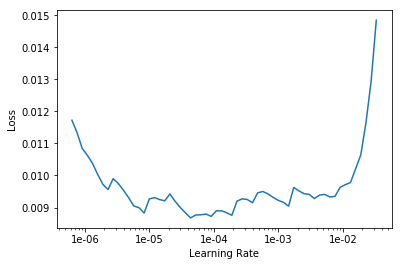

In [43]:
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe
1,0.022596,0.019113,0.144022
2,0.019612,0.017004,0.130275
3,0.016858,0.017472,0.132150
4,0.012492,0.012820,0.107549
5,0.010879,0.011364,0.101807


In [ ]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

Total time: 14:18
epoch  train_loss  valid_loss  exp_rmspe
1      0.021467    0.023627    0.149858   (02:49)
2      0.017700    0.018403    0.128610   (02:52)
3      0.014242    0.015516    0.116233   (02:51)
4      0.012754    0.011944    0.108742   (02:53)
5      0.010238    0.012665    0.105895   (02:52)



In [36]:
learn.save('1')

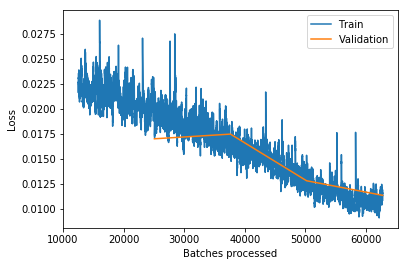

In [37]:
learn.recorder.plot_losses(last=-1)

In [38]:
learn.load('1');

In [39]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe
1,0.012362,0.014739,0.115137
2,0.012654,0.015554,0.109142
3,0.010813,0.024388,0.110102
4,0.009603,0.016288,0.106681
5,0.009215,0.021171,0.111667


In [40]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe
1,0.011194,0.015365,0.110475
2,0.013076,0.020917,0.121332
3,0.010462,0.015176,0.116029
4,0.009247,0.014975,0.116840
5,0.009771,0.017231,0.116961


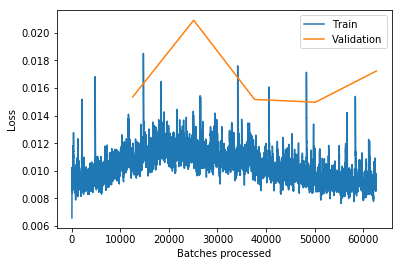

In [41]:
learn.recorder.plot_losses()

In [44]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,exp_rmspe
1,0.012982,0.036837,0.162076
2,0.015341,0.016426,0.112971
3,0.013033,0.131538,0.162311
4,0.011815,0.021066,0.119034
5,0.009256,0.088467,0.126754


(10th place in the competition was 0.108)

In [47]:
learn.load('1');

In [48]:
learn.fit_one_cycle(5, 1e-4)

epoch,train_loss,valid_loss,exp_rmspe
1,0.010438,0.012184,0.104481
2,0.010853,0.012112,0.105770
3,0.011587,0.011284,0.103127
4,0.008473,0.011540,0.102624
5,0.010068,0.011524,0.102670


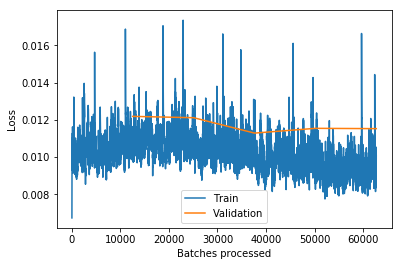

In [49]:
learn.recorder.plot_losses()

In [ ]:
learn.fit_one_cycle(5, 1e-4)

epoch,train_loss,valid_loss,exp_rmspe
1,0.009466,0.012239,0.104060
2,0.009396,0.012262,0.105415
3,0.009990,0.014421,0.108958
4,0.009397,0.010774,0.101288


## fin